POST TRAINING ERROR ANALYSIS

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import lightgbm as lgb



from sklearn.metrics import mean_squared_error
from math import sqrt

import gc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pickle
from tqdm import tqdm
import os
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Folds_Data')

In [ ]:
#importing previous model predictions
oof2,predictions_skf = pickle.load(open('skf_data','rb'))
#pickle.dump(clf, open('skf_fold', 'wb'))

In [ ]:

oof1,predictions_kf = pickle.load(open('kf_data (1)','rb'))
#pickle.dump(clf, open('kf_fold', 'wb'))

In [ ]:
rare_values,target = pickle.load(open('rare&target_values','rb'))

In [ ]:
oof_stack,predictions_stack = pickle.load(open('stack_data','rb'))

In [ ]:
import seaborn as sns

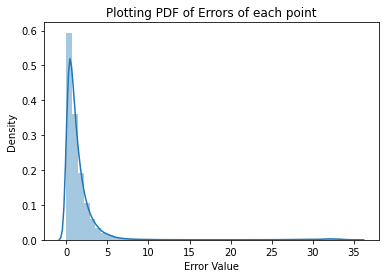

In [ ]:

sns.distplot(abs(target - oof_stack)).set(title = "Plotting PDF of Errors of each point", xlabel = "Error Value")
plt.show()

Reveiwing highly missclassified points (error > 20)

In [ ]:
# Miss classified points with error value greater than 20
index_20 = [i for i in range(len(target)) if abs(target[i] - oof_stack[i])> 20]
len([i for i in range(len(target)) if abs(target[i] - oof_stack[i]) > 20])

2185

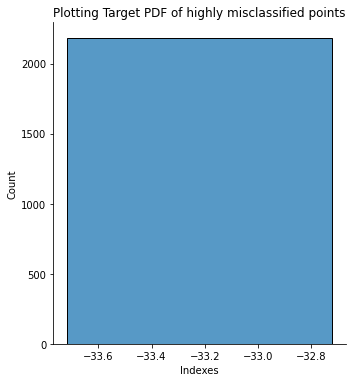

In [ ]:
sns.displot(target.iloc[index_20].values).set(title = "Plotting Target PDF of highly misclassified points", xlabel = "Indexes")


From above we can see all the highly missclassified points have target value less -30. So we can say not all the rare points are predicted properly

In [ ]:
index = [i for i in range(len(target)) if abs(target[i] - oof_stack[i])> 10 and abs(target[i] - oof_stack[i])<20 ]
print(" No of points with error value in 10 to 20 range: ", len(index))

 No of points with error value in 10 to 20 range:  357


In [ ]:
index = [i for i in range(len(target)) if abs(target[i] - oof_stack[i])> 5 and abs(target[i] - oof_stack[i])<10 ]
print(" No of points with error value in 5 to 10 range: ", len(index))

 No of points with error value in 5 to 10 range:  4356


In [ ]:
index = [i for i in range(len(target)) if abs(target[i] - oof_stack[i])> 3.5 and abs(target[i] - oof_stack[i])<5 ]
print(" No of points with error value in 3.5 to 5 range: ", len(index))

 No of points with error value in 3.5 to 5 range:  8361


In [ ]:
index = [i for i in range(len(target)) if abs(target[i] - oof_stack[i])> 3.5]
len(index)

15259

In [ ]:
index = [i for i in range(len(target)) if abs(target[i] - oof_stack[i])> 3.5 and abs(target[i] - oof_stack[i])<10 ]
len(index)

12717

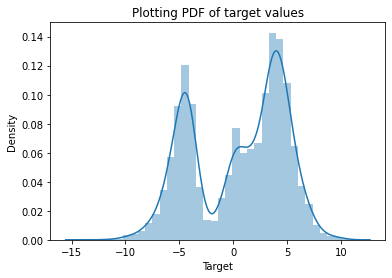

In [ ]:
sns.distplot(target.iloc[index].values).set(title = "Plotting PDF of target values", xlabel = "Target")
plt.show()

#Reviewing correctly classfied points ( Error <3.5)

In [ ]:
index_c = [i for i in range(len(target)) if abs(target[i] - oof_stack[i])< 3.5]
len(index_c)

186658

[Text(0.5, 0, 'Error Value'),
 Text(0.5, 1.0, 'PDF of correctlt predicted Target values')]

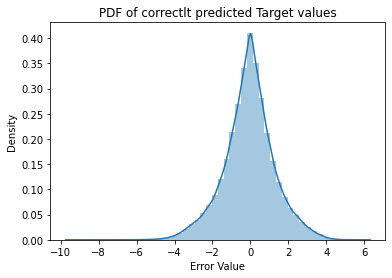

In [ ]:
sns.distplot(target.iloc[index_c].values).set(title = "PDF of correctlt predicted Target values", xlabel = "Error Value")

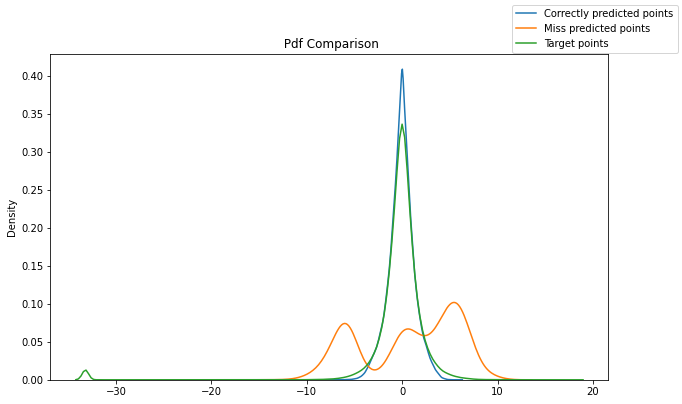

In [ ]:
fig = plt.figure(figsize=(10,6))

sns.kdeplot(target.iloc[index_c].values)
sns.kdeplot(target.iloc[index].values)
sns.kdeplot(target.values)
plt.title(" Pdf Comparison")
fig.legend(labels=['Correctly predicted points','Miss predicted points','Target points'])
plt.show()

Seems like most of the misclassified points are in -3.5 to -10 and +3.5 to 10 range